In [1]:
import warnings

warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import numpy as np

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic') 
plt.style.use("ggplot")
pd.set_option('mode.chained_assignment',  None)

# 고속도로 이용 교통량 추이

## 전국 교통량 분석

In [4]:
traffic_2018_01=pd.read_csv('data/2018_01분기.csv',encoding='cp949')
traffic_2018_02=pd.read_csv('data/2018_02분기.csv',encoding='cp949')
traffic_2018_03=pd.read_csv('data/2018_03분기.csv',encoding='cp949')
traffic_2018_04=pd.read_csv('data/2018_04분기.csv',encoding='cp949')
traffic_2019_01=pd.read_csv('data/2019_01분기.csv',encoding='cp949')
traffic_2019_02=pd.read_csv('data/2019_02분기.csv',encoding='cp949')
traffic_2019_03=pd.read_csv('data/2019_03분기.csv',encoding='cp949')
traffic_2019_04=pd.read_csv('data/2019_04분기.csv',encoding='cp949')
traffic_2020_01=pd.read_csv('data/2020_01분기.csv',encoding='cp949')
traffic_2020_02=pd.read_csv('data/2020_02분기.csv',encoding='cp949')
traffic_2020_03=pd.read_csv('data/2020_03분기.csv',encoding='cp949')
traffic_2020_04=pd.read_csv('data/2020_04분기.csv',encoding='cp949')
traffic_2021_01=pd.read_csv('data/2021_01분기.csv',encoding='cp949')
traffic_2021_02=pd.read_csv('data/2021_02분기.csv',encoding='cp949')

In [5]:
traffic_data=pd.concat([traffic_2018_01,traffic_2018_02,traffic_2018_03,traffic_2018_04,
                        traffic_2019_01,traffic_2019_02,traffic_2019_03,traffic_2019_04,
                        traffic_2020_01,traffic_2020_02,traffic_2020_03,traffic_2020_04,
                        traffic_2021_01,traffic_2021_02])
traffic_data.head()

,집계일자,영업소코드,영업소명,입출구구분코드,입출구명,TCS하이패스구분코드,TCS하이패스명,고속도로운영기관구분코드,고속도로운영기관명,영업형태구분코드,영업형태명,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량
0,20180101,246,가락,0,입구,1,TCS,0,한국도로공사,0,폐쇄식,211,6,6,21,27,4,275
1,20180101,246,가락,0,입구,2,hi-pass,0,한국도로공사,0,폐쇄식,615,14,5,14,96,26,770
2,20180101,29,가락(개),0,입구,1,TCS,0,한국도로공사,1,개방식,2358,31,48,57,131,273,2898
3,20180101,29,가락(개),0,입구,2,hi-pass,0,한국도로공사,1,개방식,7148,27,71,27,267,378,7918
4,20180101,29,가락(개),1,출구,1,TCS,0,한국도로공사,1,개방식,2946,29,52,48,150,357,3582


In [6]:
traffic_data.index=traffic_data.집계일자
traffic_data=traffic_data.drop('집계일자',axis=1)
traffic_data=traffic_data[['영업소명','1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량']]
traffic_data.index=pd.to_datetime(traffic_data.index, format='%Y%m%d')
traffic_data['year']=traffic_data.index.year 
traffic_data['month']=traffic_data.index.month
days={0:'MON',1:'TUE',2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'}
traffic_data['day_of_week']=traffic_data.index.dayofweek 
traffic_data.day_of_week=traffic_data.day_of_week.apply(lambda x : days[x])
traffic_data.head()

,영업소명,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,year,month,day_of_week
집계일자,,,,,,,,,,,
2018-01-01,가락,211,6,6,21,27,4,275,2018,1,MON
2018-01-01,가락,615,14,5,14,96,26,770,2018,1,MON
2018-01-01,가락(개),2358,31,48,57,131,273,2898,2018,1,MON
2018-01-01,가락(개),7148,27,71,27,267,378,7918,2018,1,MON
2018-01-01,가락(개),2946,29,52,48,150,357,3582,2018,1,MON


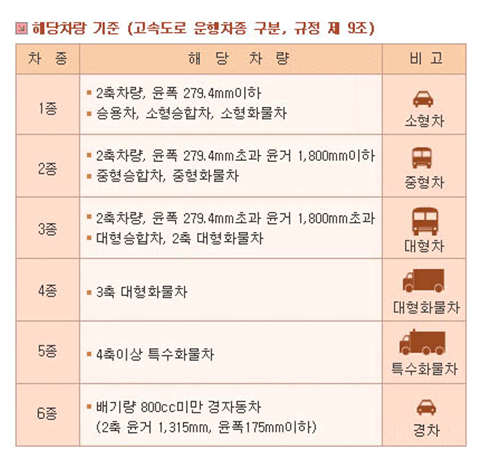

In [7]:
# 명칭이 불규칙하여 통일

traffic_data=traffic_data.replace('서서울영업소','서서울')
traffic_data=traffic_data.replace('서울영업소','서울')
traffic_data=traffic_data.replace('서대구영업소','서대구')
traffic_data=traffic_data.replace('북대구영업소','북대구')
traffic_data=traffic_data.replace('남대구영업소','남대구')

In [8]:
# 모든 곳의 톨게이트에 대한 교통량 합산

traffic_data_total=traffic_data.groupby('집계일자')['1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량'].sum()
traffic_data_total['year']=traffic_data_total.index.year
traffic_data_total['month']=traffic_data_total.index.month
days={0:'MON',1:'TUE',2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'}
traffic_data_total['day_of_week']=traffic_data_total.index.dayofweek
traffic_data_total.day_of_week=traffic_data_total.day_of_week.apply(lambda x : days[x])
traffic_data_total.head()

,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,year,month,day_of_week
집계일자,,,,,,,,,,
2018-01-01,5562671,64729,140284,36796,34705,240045,6079230,2018,1,MON
2018-01-02,4945308,200328,257620,163881,234282,290196,6091615,2018,1,TUE
2018-01-03,4841053,232174,293244,212214,294425,289377,6162487,2018,1,WED
2018-01-04,4902656,232305,293413,209227,300632,291083,6229316,2018,1,THU
2018-01-05,5342859,233726,299322,209493,299666,310678,6695744,2018,1,FRI


<AxesSubplot:title={'center':'The Traffic Trend By Year And Month'}, xlabel='month', ylabel='총교통량'>

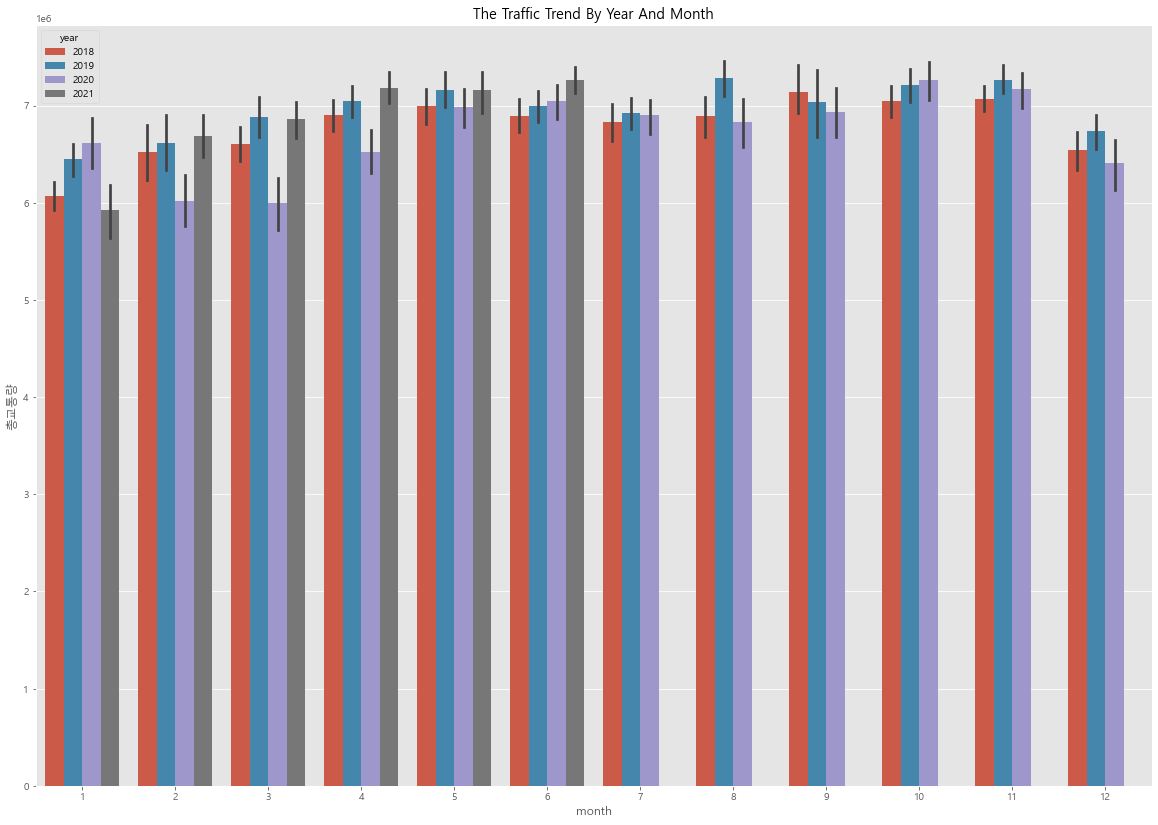

In [9]:
# 월별, 연도별 총교통량 추이

plt.figure(figsize=(20,14))
plt.title('The Traffic Trend By Year And Month')
sns.barplot(x='month', y='총교통량',hue='year',data=traffic_data_total)

### 교통량 추이 확인 - 1종 교통량

<AxesSubplot:title={'center':'The Trend Of Type fist Traffic On Saturdays (2018-2021)\n'}, xlabel='집계일자', ylabel='1종교통량'>

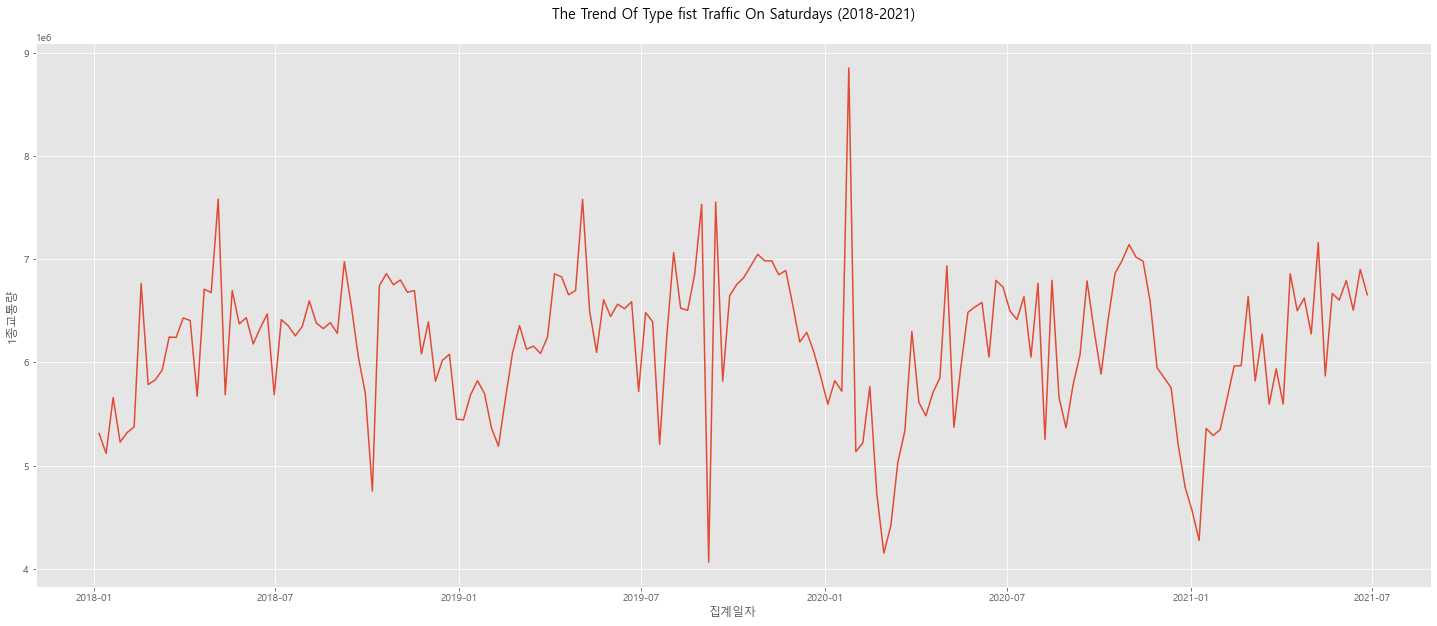

In [10]:
# 2018~2021 교통량 추이 확인 // 1종교통량 토요일

plt.figure(figsize=(25,10))
plt.title('The Trend Of Type fist Traffic On Saturdays (2018-2021)\n')
sns.lineplot(data=traffic_data_total[(traffic_data_total.day_of_week=='SAT')], x='집계일자', y='1종교통량')

2020년 1월 1일 기준으로 보았을 때, 코로나 이전에도 교통량이 급격히 줄어드는 구간이 보이지만,
코로나 이후의 교통량 감소의 폭이 눈에 띄게 적다는 것을 확인해볼 수 있다.
코로나 이후의 교통량 급격한 감소의 시기는 코로나 확진자 수가 급증한 대유행 시기일 것이라고 예측되어진다.

In [11]:
# 요일별 차종 평균 교통량

day_traffic_data_1st=traffic_data.groupby('day_of_week')['1종교통량'].mean()
day_traffic_data_remain=traffic_data.groupby('day_of_week')['2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량'].mean()
day_traffic_data_total=traffic_data.groupby('day_of_week')['총교통량'].mean() 

<AxesSubplot:title={'center':'The Average Traffic Volume By Day'}, xlabel='day_of_week'>

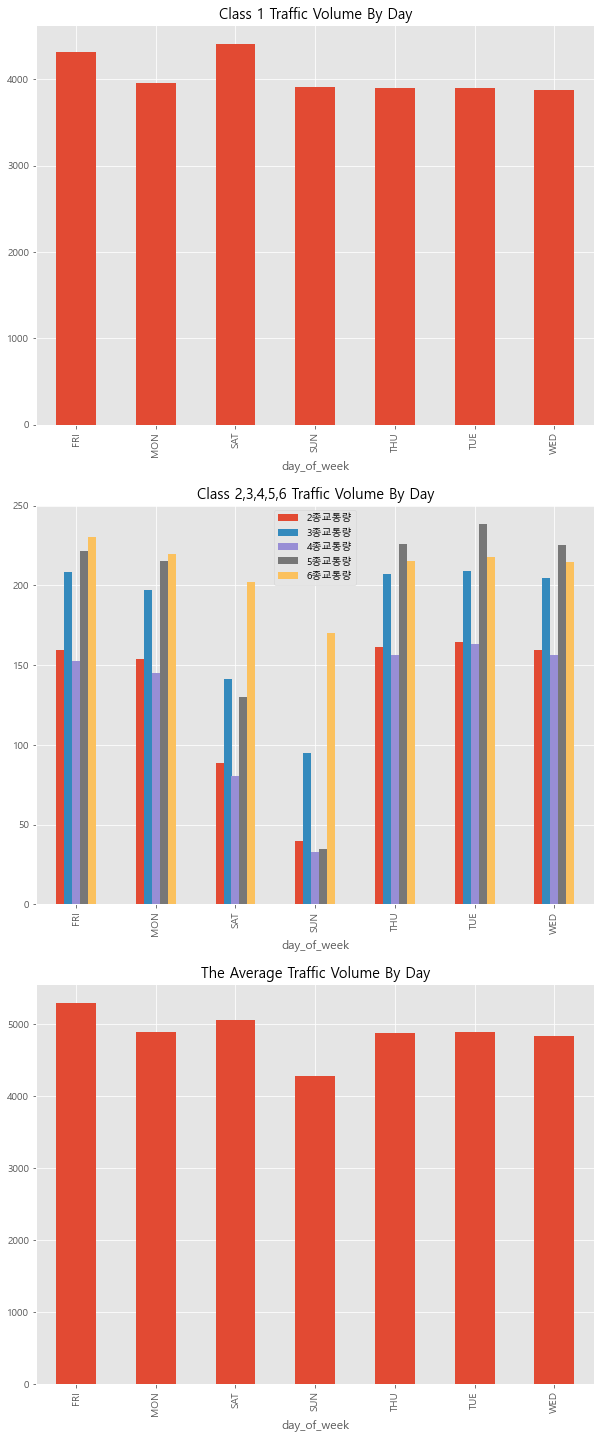

In [12]:
fig, axes=plt.subplots(nrows=3)
fig.set_size_inches(10,25)

axes[0].set(title='Class 1 Traffic Volume By Day')
axes[1].set(title='Class 2,3,4,5,6 Traffic Volume By Day')
axes[2].set(title='The Average Traffic Volume By Day')

day_traffic_data_1st.plot(kind='bar',ax=axes[0])
day_traffic_data_remain.plot(kind='bar',ax=axes[1])
day_traffic_data_total.plot(kind='bar',ax=axes[2])

요일별 교통량을 확인해본 결과, 1종 교통의 교통량은 요일과 관계없이 거의 비슷하다.
2종부터 6종까지의 교통량은 주말이 적으며, 평일이 많다.
이는 근무를 위해 움직이는 사람들의 교통량에 의해서 많다고 생각되어지며,
개인적인 일로 움직이는 교통량을 확인하기 위해서는 주말의 교통량을 확인해볼 필요가 있다고 생각된다.
또한, 1종 교통량 혹은 총 교통량보다는 나머지 교통량을 확인해보는 것이 뚜렷한 변화를 확인해볼 수 있을 것 같다.

## 서울 교통량 분석

In [13]:
# 가장 유동인구가 많은 서울시의 교통량을 확인해보자

seoul_traffic_data=traffic_data[(traffic_data['영업소명']=='서서울')|(traffic_data['영업소명']=='동서울')|(traffic_data['영업소명']=='서울')]
seoul_traffic_data=seoul_traffic_data.groupby('집계일자')['1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량'].sum()
seoul_traffic_data['year']=seoul_traffic_data.index.year
seoul_traffic_data['month']=seoul_traffic_data.index.month
days={0:'MON',1:'TUE',2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'}
seoul_traffic_data['day_of_week']=seoul_traffic_data.index.dayofweek
seoul_traffic_data.day_of_week=seoul_traffic_data.day_of_week.apply(lambda x : days[x])
seoul_traffic_data.head()

,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,year,month,day_of_week
집계일자,,,,,,,,,,
2018-01-01,422993,5819,20619,2523,1392,18046,471392,2018,1,MON
2018-01-02,412943,17056,29178,11928,9202,22481,502788,2018,1,TUE
2018-01-03,395108,20067,32127,16606,11753,22022,497683,2018,1,WED
2018-01-04,402322,19891,32029,16087,11928,22179,504436,2018,1,THU
2018-01-05,435052,19531,33259,15420,11579,23623,538464,2018,1,FRI


### 1종 교통량

<AxesSubplot:title={'center':"\nThe Seoul's First Class Traffic Trend (2020-2021)\n"}, xlabel='집계일자', ylabel='1종교통량'>

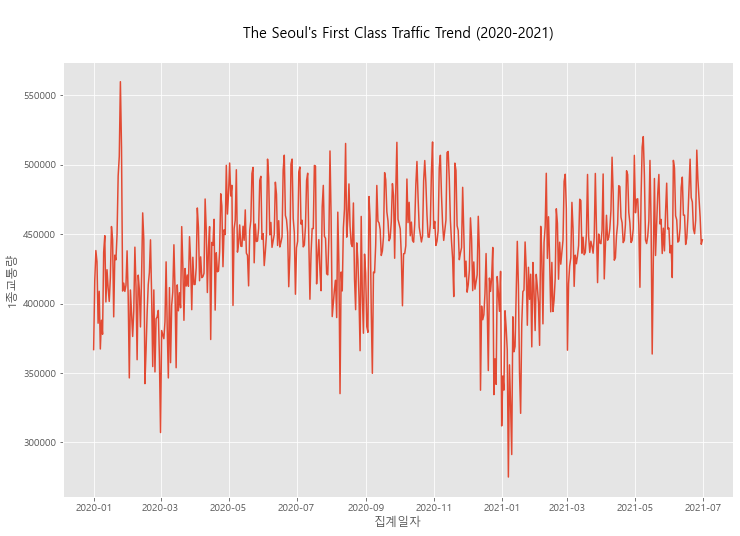

In [14]:
# 1종 교통량(대부분의 자가용) 분석 

plt.figure(figsize=(12,8)) 
plt.title('\nThe Seoul\'s First Class Traffic Trend (2020-2021)\n')
sns.lineplot(data=seoul_traffic_data[((seoul_traffic_data.year==2020)|(seoul_traffic_data.year==2021))], x='집계일자', y='1종교통량')

교통량이 갑자기 줄어드는 시기가 눈에 보이지만, 주중과 주말의 교통량 극심한 차이로 인하여 그래프 상에서 진동이 심하게 일어난다.
따라서 주말만 비교해 보자.

<AxesSubplot:title={'center':"\nTrend Of Seoul's First Class Traffic On Saturday (2020-2021)\n"}, xlabel='집계일자', ylabel='1종교통량'>

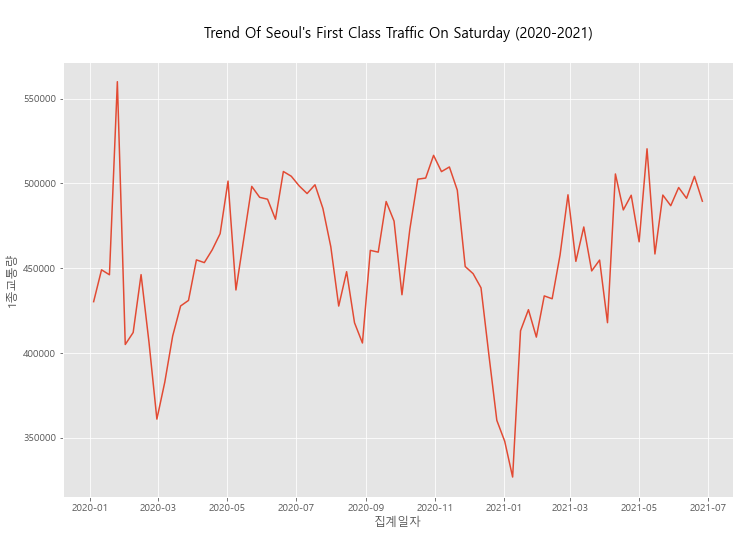

In [15]:
# 1종 교통량(대부분의 자가용) 토요일 분석

plt.figure(figsize=(12,8)) 
plt.title('\nTrend Of Seoul\'s First Class Traffic On Saturday (2020-2021)\n')
sns.lineplot(data=seoul_traffic_data[(seoul_traffic_data.day_of_week=='SAT')&((seoul_traffic_data.year==2020)|(seoul_traffic_data.year==2021))], x='집계일자', y='1종교통량')

<AxesSubplot:title={'center':"\nTrend Of Seoul's First Class Traffic On Sunday (2020-2021)\n"}, xlabel='집계일자', ylabel='1종교통량'>

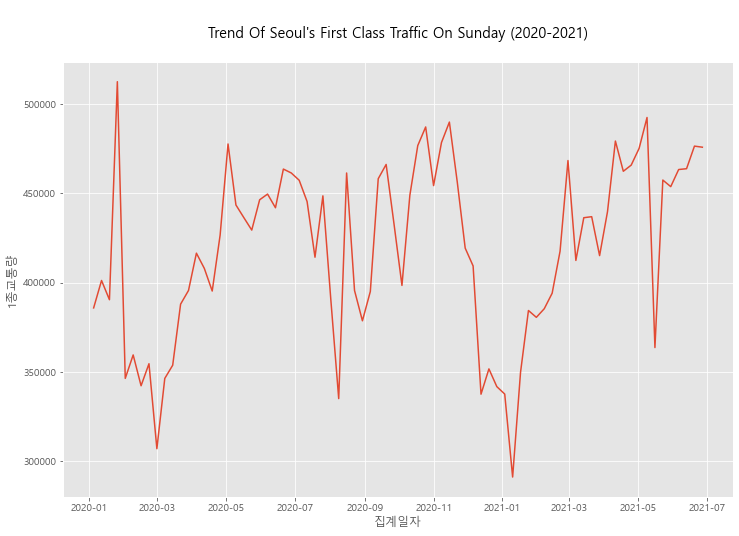

In [16]:
# 1종 교통량(대부분의 자가용) 일요일 분석

plt.figure(figsize=(12,8)) 
plt.title('\nTrend Of Seoul\'s First Class Traffic On Sunday (2020-2021)\n')
sns.lineplot(data=seoul_traffic_data[(seoul_traffic_data.day_of_week=='SUN')&((seoul_traffic_data.year==2020)|(seoul_traffic_data.year==2021))], x='집계일자', y='1종교통량')

<AxesSubplot:title={'center':"\nTrend Of Seoul's First Class Traffic On Weekdays (2020-2021)\n"}, xlabel='집계일자', ylabel='1종교통량'>

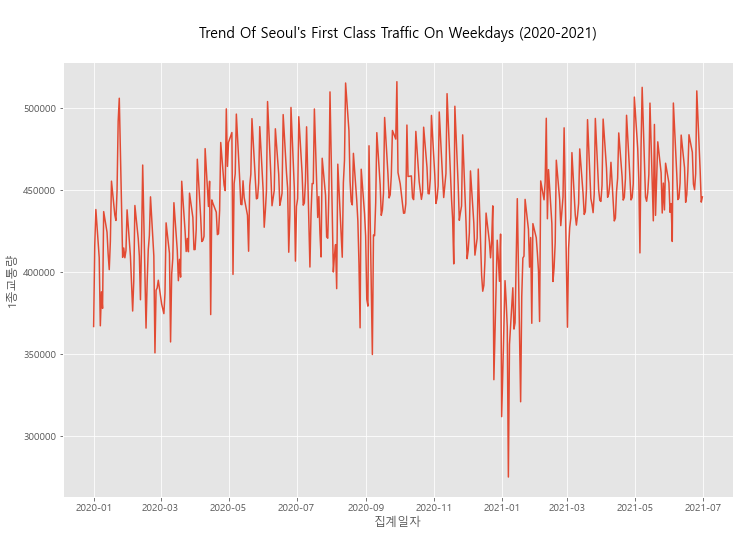

In [17]:
# 1종 교통량(대부분의 자가용) 주중 분석

plt.figure(figsize=(12,8)) 
plt.title('\nTrend Of Seoul\'s First Class Traffic On Weekdays (2020-2021)\n')
sns.lineplot(data=seoul_traffic_data[((seoul_traffic_data.day_of_week=='MON')
                                    |(seoul_traffic_data.day_of_week=='TUE')
                                    |(seoul_traffic_data.day_of_week=='WED')
                                    |(seoul_traffic_data.day_of_week=='THU')
                                    |(seoul_traffic_data.day_of_week=='FRI'))
                                    &((seoul_traffic_data.year==2020)|(seoul_traffic_data.year==2021))], x='집계일자', y='1종교통량')

<AxesSubplot:title={'center':"\nTrend Of Seoul's First Class Traffic On Weekend (2020-2021)\n"}, xlabel='집계일자', ylabel='1종교통량'>

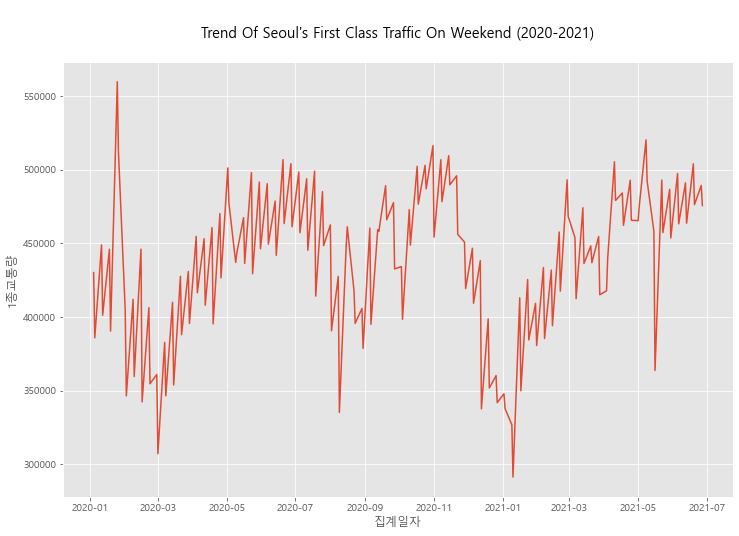

In [18]:
# 1종 교통량(대부분의 자가용) 주말 분석

plt.figure(figsize=(12,8)) 
plt.title('\nTrend Of Seoul\'s First Class Traffic On Weekend (2020-2021)\n')
sns.lineplot(data=seoul_traffic_data[((seoul_traffic_data.day_of_week=='SUN')|(seoul_traffic_data.day_of_week=='SAT'))&((seoul_traffic_data.year==2020)|(seoul_traffic_data.year==2021))], x='집계일자', y='1종교통량')

코로나 발생 이전과 이후의 교통량 변화를 확인해 보기 위해서는 2018-2019년 교통량 중앙값과 차이를 보는 것이 더 의미있을 것이라 생각 되었다.

In [19]:
seoul_weekdays_first_median_2018_2021=seoul_traffic_data[((seoul_traffic_data.day_of_week=='MON')
                                                        |(seoul_traffic_data.day_of_week=='TUE')
                                                        |(seoul_traffic_data.day_of_week=='WED')
                                                        |(seoul_traffic_data.day_of_week=='THU')
                                                        |(seoul_traffic_data.day_of_week=='FRI'))]['1종교통량'].median()
seoul_weekdays_first_median_2018_2019=seoul_traffic_data[((seoul_traffic_data.day_of_week=='MON')
                                                        |(seoul_traffic_data.day_of_week=='TUE')
                                                        |(seoul_traffic_data.day_of_week=='WED')
                                                        |(seoul_traffic_data.day_of_week=='THU')
                                                        |(seoul_traffic_data.day_of_week=='FRI'))
                                                        &((seoul_traffic_data.year==2018)|(seoul_traffic_data.year==2019))]['1종교통량'].median()
print('2018-2021 주중 서울시 1종 교통량 중앙값 : %.1f\n2018-2019 주중 서울시 1종 교통량 중앙값 : %.1f'%(seoul_weekdays_first_median_2018_2021,seoul_weekdays_first_median_2018_2019))

2018-2021 주중 서울시 1종 교통량 중앙값 : 440439.5
2018-2019 주중 서울시 1종 교통량 중앙값 : 439122.5


<AxesSubplot:xlabel='집계일자', ylabel='1종교통량'>

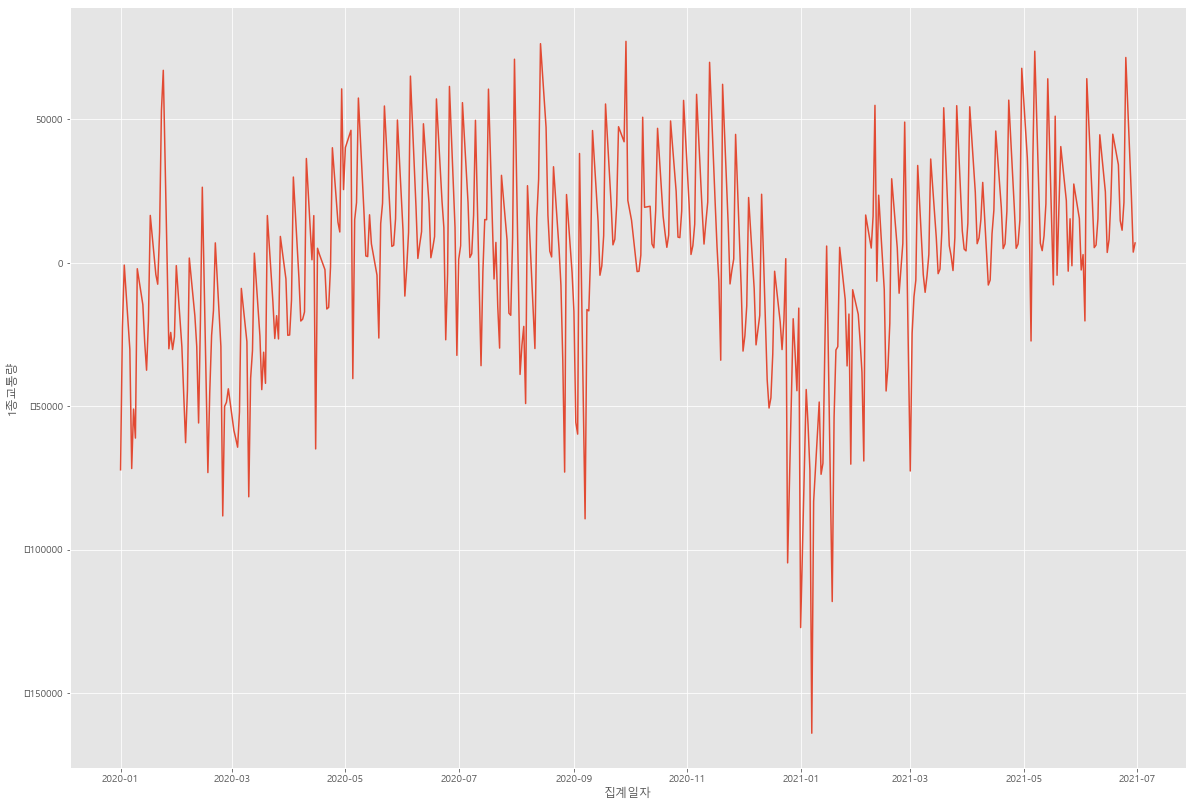

In [20]:
plt.figure(figsize=(20,14))
seoul_weekdays_first_diff=pd.DataFrame(seoul_traffic_data[((seoul_traffic_data.day_of_week=='MON')
                                            |(seoul_traffic_data.day_of_week=='TUE')
                                            |(seoul_traffic_data.day_of_week=='WED')
                                            |(seoul_traffic_data.day_of_week=='THU')
                                            |(seoul_traffic_data.day_of_week=='FRI'))
                                            &((seoul_traffic_data.year==2020)|(seoul_traffic_data.year==2021))]['1종교통량']-seoul_weekdays_first_median_2018_2019)

seoul_weekdays_first_diff['집계일자']=seoul_weekdays_first_diff.index
sns.lineplot(data=seoul_weekdays_first_diff,x='집계일자', y='1종교통량')

### 2종 교통량

자가용이 아닌 택배 차량을 확인해 보자.
쿠팡, CJ 택배와 같은 화물 차양은 2종 차량으로 분류 된다.

<AxesSubplot:title={'center':"\nTrend Of Seoul's First Class Traffic On Weekdays (2020-2021)\n"}, xlabel='집계일자', ylabel='2종교통량'>

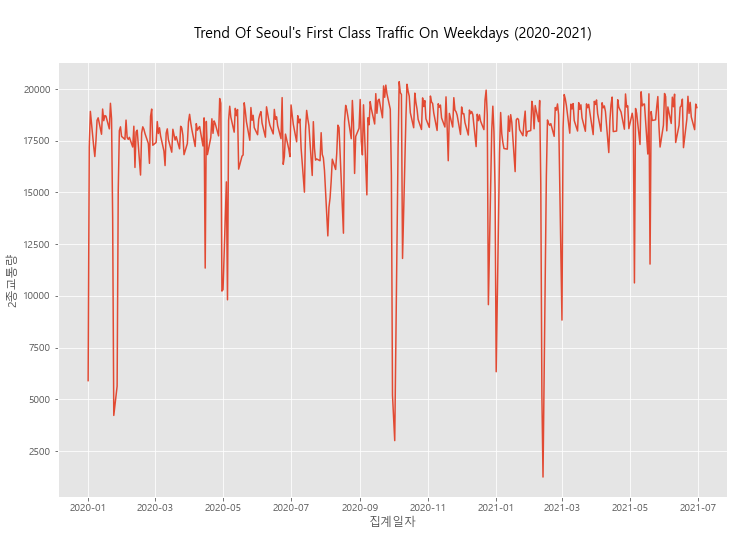

In [21]:
# 2종 교통량(중형차) 주중 분석

plt.figure(figsize=(12,8)) 
plt.title('\nTrend Of Seoul\'s First Class Traffic On Weekdays (2020-2021)\n')
sns.lineplot(data=seoul_traffic_data[((seoul_traffic_data.day_of_week=='MON')
                                      |(seoul_traffic_data.day_of_week=='TUE')
                                      |(seoul_traffic_data.day_of_week=='WED')
                                      |(seoul_traffic_data.day_of_week=='THU')
                                      |(seoul_traffic_data.day_of_week=='FRI'))
                                      &((seoul_traffic_data.year==2020)|(seoul_traffic_data.year==2021))],
                                      x='집계일자', y='2종교통량')

<AxesSubplot:title={'center':"\nTrend Of Seoul's First Class Traffic On Saturday (2020-2021)\n"}, xlabel='집계일자', ylabel='2종교통량'>

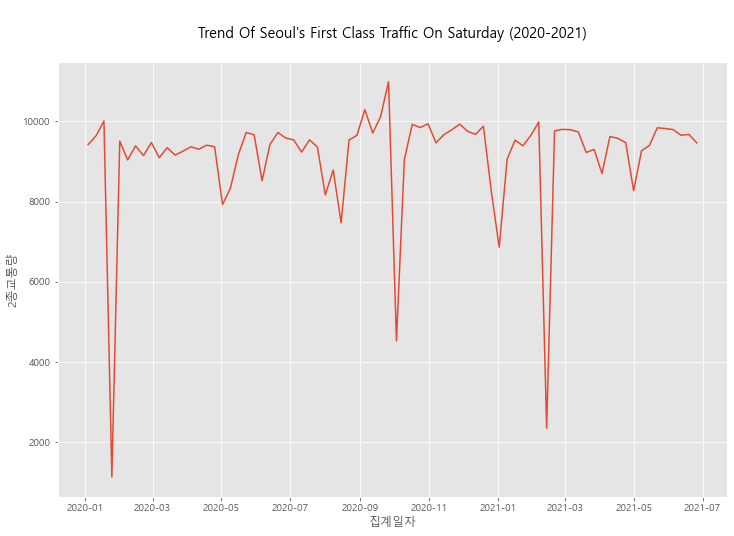

In [22]:
# 2종 교통량(중형차) 토요일 분석

plt.figure(figsize=(12,8)) 
plt.title('\nTrend Of Seoul\'s First Class Traffic On Saturday (2020-2021)\n')
sns.lineplot(data=seoul_traffic_data[(seoul_traffic_data.day_of_week=='SAT')
                                      &((seoul_traffic_data.year==2020)|(seoul_traffic_data.year==2021))],
                                      x='집계일자', y='2종교통량')

<AxesSubplot:title={'center':"\nTrend Of Seoul's First Class Traffic On Sunday (2020-2021)\n"}, xlabel='집계일자', ylabel='2종교통량'>

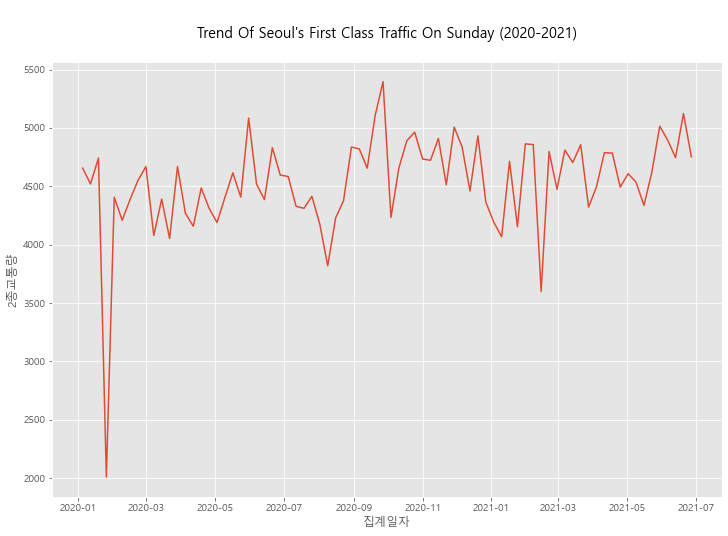

In [23]:
# 2종 교통량(중형차) 토요일 분석

plt.figure(figsize=(12,8)) 
plt.title('\nTrend Of Seoul\'s First Class Traffic On Sunday (2020-2021)\n')
sns.lineplot(data=seoul_traffic_data[(seoul_traffic_data.day_of_week=='SUN')
                                      &((seoul_traffic_data.year==2020)|(seoul_traffic_data.year==2021))],
                                      x='집계일자', y='2종교통량')

## 대구 교통량 분석

In [24]:
#코로나 19 1차 대유행발발 지역인 대구를 추가적으로 살펴 보자.

daegu_traffic_data=traffic_data[(traffic_data['영업소명']=='서대구')|(traffic_data['영업소명']=='남대구')|(traffic_data['영업소명']=='북대구')].groupby('집계일자')['1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량'].sum()
daegu_traffic_data['year']=daegu_traffic_data.index.year
daegu_traffic_data['month']=daegu_traffic_data.index.month
days={0:'MON',1:'TUE',2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'}
daegu_traffic_data['day_of_week']=daegu_traffic_data.index.dayofweek
daegu_traffic_data.day_of_week=daegu_traffic_data.day_of_week.apply(lambda x : days[x])
daegu_traffic_data.head()

,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,year,month,day_of_week
집계일자,,,,,,,,,,
2018-01-01,158432,1384,3607,712,516,5847,170498,2018,1,MON
2018-01-02,161220,6162,7056,3431,3685,7883,189437,2018,1,TUE
2018-01-03,160008,7111,8303,4490,4598,7705,192215,2018,1,WED
2018-01-04,161046,6983,8325,4443,4951,7736,193484,2018,1,THU
2018-01-05,174056,7281,8340,4325,5110,8321,207433,2018,1,FRI


[Text(0.5, 1.0, '\n대구 1종 교통량 분석\n')]

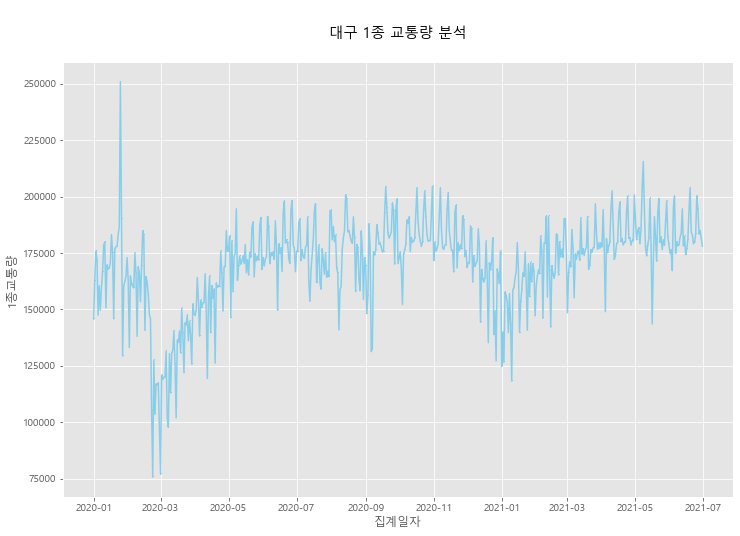

In [25]:
# 1종 교통량(대부분의 자가용) 분석 /

plt.figure(figsize=(12,8)) 
daegu_1_all=sns.lineplot(data=daegu_traffic_data[((daegu_traffic_data.year==2020)|(daegu_traffic_data.year==2021))], x='집계일자', y='1종교통량',linestyle='-', color='skyblue', marker=',')
daegu_1_all.set(title='\n대구 1종 교통량 분석\n')

[Text(0.5, 1.0, '\n대구 1종 교통량 토요일\n')]

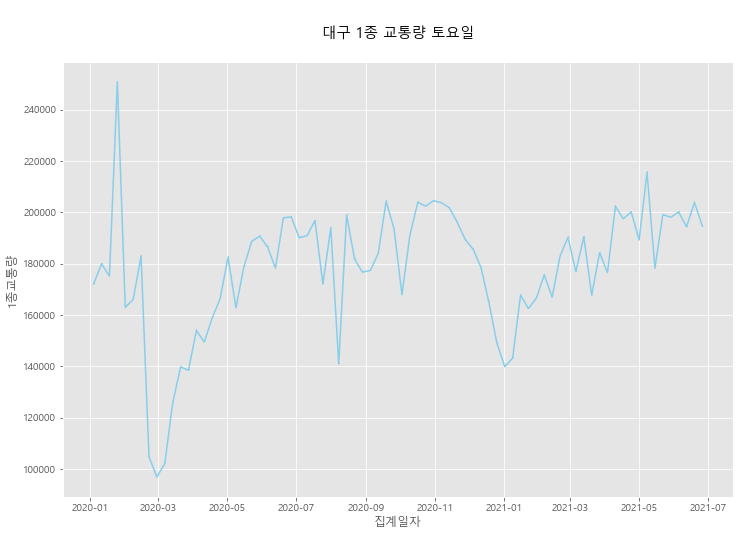

In [26]:
# 1종 교통량(대부분의 자가용) 분석 // 토요일

plt.figure(figsize=(12,8)) 
daegu_1_sat=sns.lineplot(data=daegu_traffic_data[(daegu_traffic_data.day_of_week=='SAT')&((daegu_traffic_data.year==2020)|(daegu_traffic_data.year==2021))], x='집계일자', y='1종교통량',linestyle='-', color='skyblue', marker=',')
daegu_1_sat.set(title='\n대구 1종 교통량 토요일\n')

[Text(0.5, 1.0, '\n대구 1종 교통량 일요일\n')]

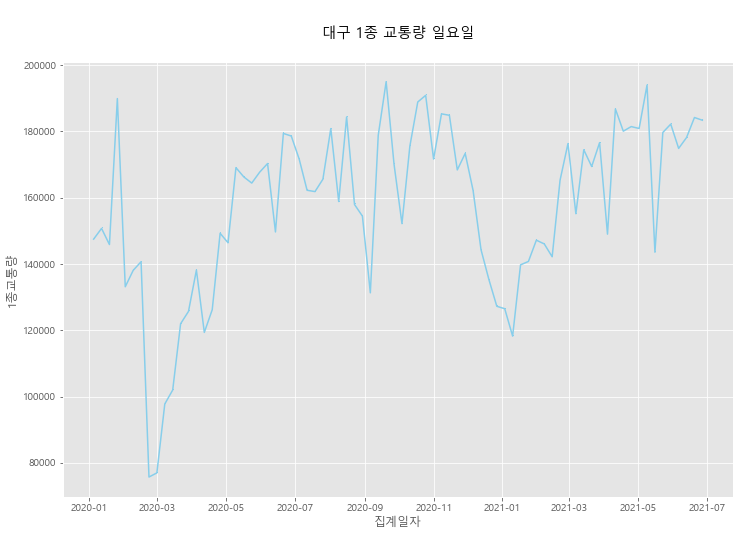

In [27]:
# 1종 교통량(대부분의 자가용) 분석 // 일요일

plt.figure(figsize=(12,8)) 
daegu_1_sun=sns.lineplot(data=daegu_traffic_data[(daegu_traffic_data.day_of_week=='SUN')&((daegu_traffic_data.year==2020)|(daegu_traffic_data.year==2021))], x='집계일자', y='1종교통량',linestyle='-', color='skyblue', marker=',')
daegu_1_sun.set(title='\n대구 1종 교통량 일요일\n')

[Text(0.5, 1.0, '\n대구 1종 교통량 주말\n')]

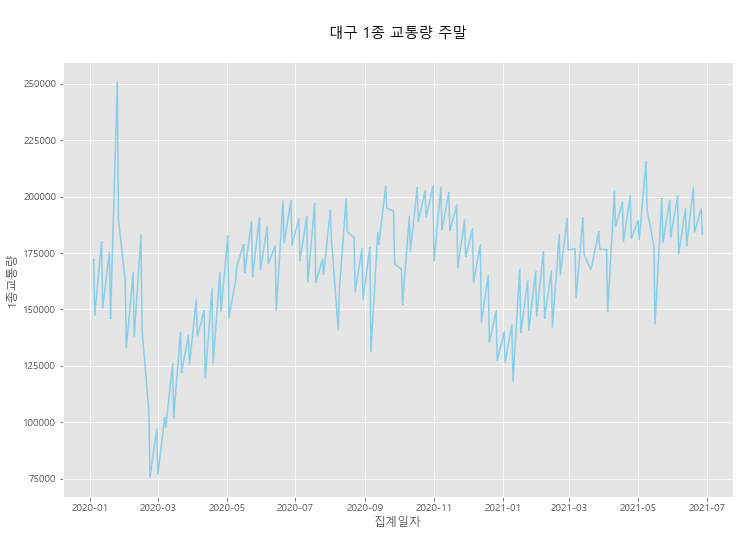

In [28]:
# 1종 교통량(대부분의 자가용) 분석 // 주말

plt.figure(figsize=(12,8)) 
daegu_1_weekend=sns.lineplot(data=daegu_traffic_data[((daegu_traffic_data.day_of_week=='SAT')|(daegu_traffic_data.day_of_week=='SUN'))&((daegu_traffic_data.year==2020)|(daegu_traffic_data.year==2021))], x='집계일자', y='1종교통량',linestyle='-', color='skyblue', marker=',')
daegu_1_weekend.set(title='\n대구 1종 교통량 주말\n')

[Text(0.5, 1.0, '\n대구 1종 교통량 주중\n')]

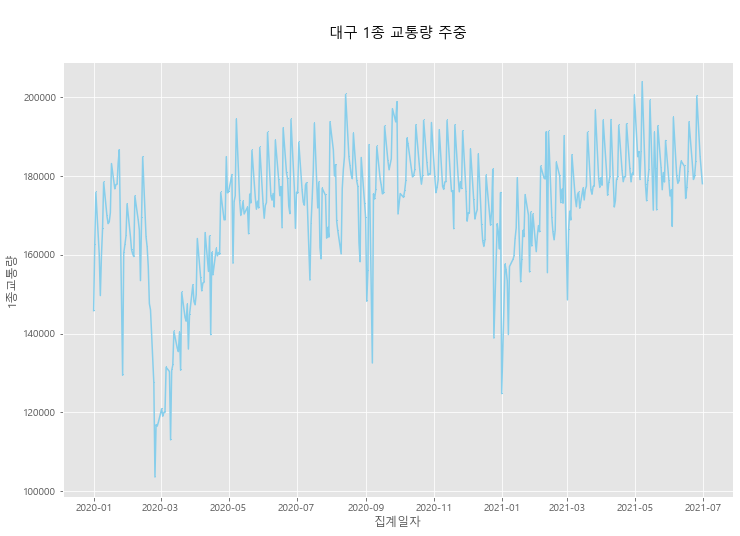

In [29]:
# 1종 교통량(대부분의 자가용) 분석 // 주중

plt.figure(figsize=(12,8)) 
daegu_1_weekdays=sns.lineplot(data=daegu_traffic_data[((daegu_traffic_data.day_of_week=='MON')|(daegu_traffic_data.day_of_week=='TUE')|(daegu_traffic_data.day_of_week=='WED')|(daegu_traffic_data.day_of_week=='THU')|(daegu_traffic_data.day_of_week=='FRI'))&((daegu_traffic_data.year==2020)|(daegu_traffic_data.year==2021))], x='집계일자', y='1종교통량',linestyle='-', color='skyblue', marker=',')
daegu_1_weekdays.set(title='\n대구 1종 교통량 주중\n')

### 대구 요일별 중앙값과 차이 비교

[Text(0.5, 1.0, '\n대구 2종 교통량 difference MON\n')]

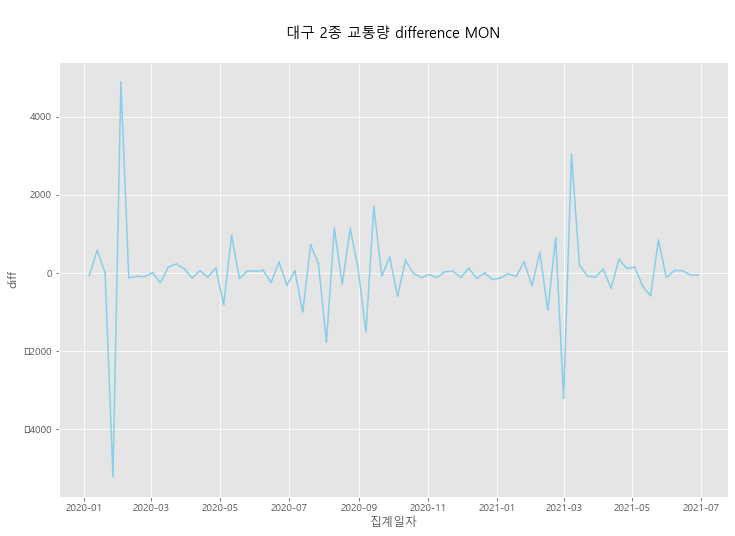

In [30]:
#요일별 편차 // 월요일

two_traffic_mon= daegu_traffic_data[daegu_traffic_data.day_of_week=='MON']
two_traffic_temp=two_traffic_mon['2종교통량'].values
two_traffic_temp = np.insert(two_traffic_temp,0,0)
two_traffic_temp = np.delete(two_traffic_temp,two_traffic_temp.shape[0]-1)
two_traffic_mon['diff_temp']=two_traffic_temp
two_traffic_mon['diff']=two_traffic_mon['2종교통량']-two_traffic_mon['diff_temp']
two_traffic_mon['diff2']=two_traffic_mon['2종교통량']-two_traffic_mon['2종교통량'].median()
two_traffic_mon.head()
plt.figure(figsize=(12,8)) 
daegu_1_weekdays=sns.lineplot(data=two_traffic_mon[((two_traffic_mon.year==2020)|(two_traffic_mon.year==2021))], x='집계일자', y='diff',linestyle='-', color='skyblue', marker=',')
daegu_1_weekdays.set(title='\n대구 2종 교통량 difference MON\n')

[Text(0.5, 1.0, '\n대구 2종 교통량 difference TUE \n')]

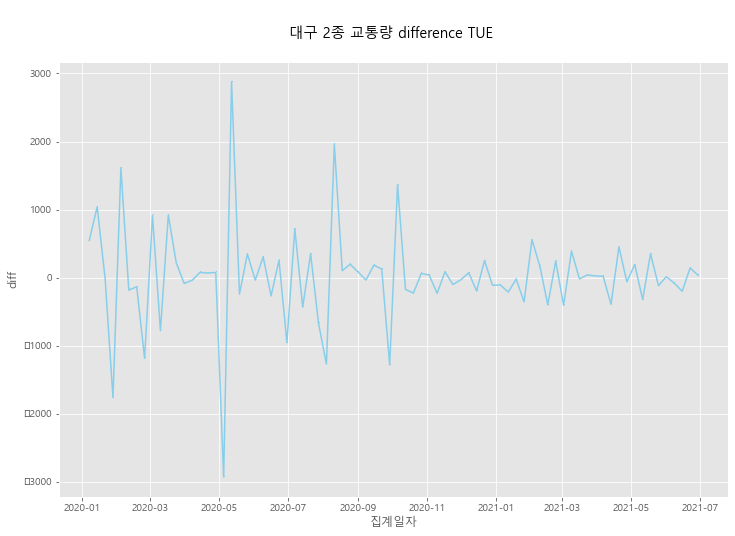

In [31]:
#요일별 편차 // 화요일
two_traffic_tue= daegu_traffic_data[daegu_traffic_data.day_of_week=='TUE']
two_traffic_temp=two_traffic_tue['2종교통량'].values
two_traffic_temp = np.insert(two_traffic_temp,0,0)
two_traffic_temp = np.delete(two_traffic_temp,two_traffic_temp.shape[0]-1)
two_traffic_tue['diff_temp']=two_traffic_temp
two_traffic_tue['diff']=two_traffic_tue['2종교통량']-two_traffic_tue['diff_temp']
two_traffic_tue['diff2']=two_traffic_tue['2종교통량']-two_traffic_tue['2종교통량'].median()
two_traffic_tue.head()
plt.figure(figsize=(12,8)) 
daegu_1_weekdays=sns.lineplot(data=two_traffic_tue[((two_traffic_tue.year==2020)|(two_traffic_tue.year==2021))], x='집계일자', y='diff',linestyle='-', color='skyblue', marker=',')
daegu_1_weekdays.set(title='\n대구 2종 교통량 difference TUE \n')

[Text(0.5, 1.0, '\n대구 2종 교통량 difference WED\n')]

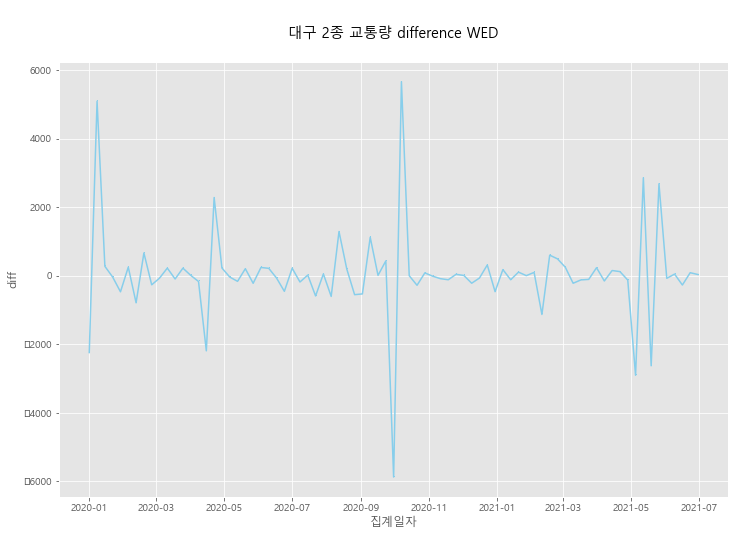

In [32]:
#요일별 편차 // 수요일
two_traffic_WED= daegu_traffic_data[daegu_traffic_data.day_of_week=='WED']
two_traffic_temp=two_traffic_WED['2종교통량'].values
two_traffic_temp = np.insert(two_traffic_temp,0,0)
two_traffic_temp = np.delete(two_traffic_temp,two_traffic_temp.shape[0]-1)
two_traffic_WED['diff_temp']=two_traffic_temp
two_traffic_WED['diff']=two_traffic_WED['2종교통량']-two_traffic_WED['diff_temp']
two_traffic_WED['diff2']=two_traffic_WED['2종교통량']-two_traffic_WED['2종교통량'].median()
two_traffic_WED.head()
plt.figure(figsize=(12,8)) 
daegu_1_weekdays=sns.lineplot(data=two_traffic_WED[((two_traffic_WED.year==2020)|(two_traffic_WED.year==2021))], x='집계일자', y='diff',linestyle='-', color='skyblue', marker=',')
daegu_1_weekdays.set(title='\n대구 2종 교통량 difference WED\n')

[Text(0.5, 1.0, '\n대구 2종 교통량 difference FRI\n')]

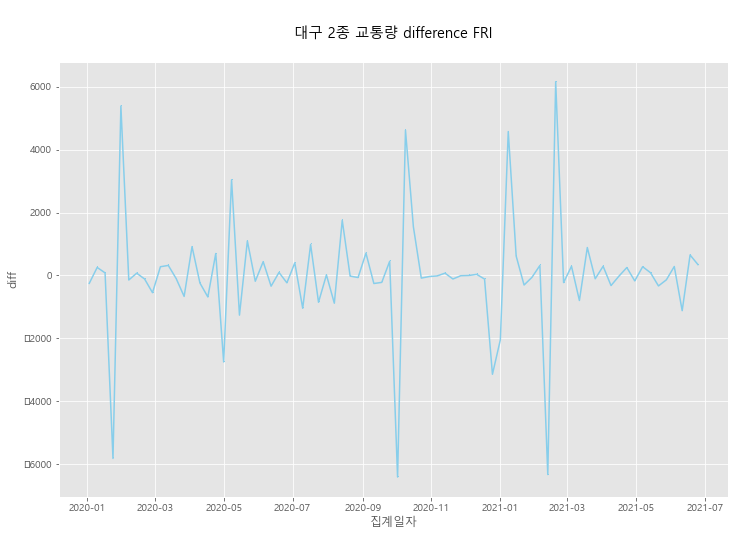

In [33]:
#요일별 편차 // 금요일
two_traffic_FRI= daegu_traffic_data[daegu_traffic_data.day_of_week=='FRI']
two_traffic_temp=two_traffic_FRI['2종교통량'].values
two_traffic_temp = np.insert(two_traffic_temp,0,0)
two_traffic_temp = np.delete(two_traffic_temp,two_traffic_temp.shape[0]-1)
two_traffic_FRI['diff_temp']=two_traffic_temp
two_traffic_FRI['diff']=two_traffic_FRI['2종교통량']-two_traffic_FRI['diff_temp']
two_traffic_FRI['diff2']=two_traffic_FRI['2종교통량']-two_traffic_FRI['2종교통량'].median()
two_traffic_FRI.head()
plt.figure(figsize=(12,8)) 
daegu_1_weekdays=sns.lineplot(data=two_traffic_FRI[((two_traffic_FRI.year==2020)|(two_traffic_FRI.year==2021))], x='집계일자', y='diff',linestyle='-', color='skyblue', marker=',')
daegu_1_weekdays.set(title='\n대구 2종 교통량 difference FRI\n')

[Text(0.5, 1.0, '\n대구 2종 교통량 difference SAT\n')]

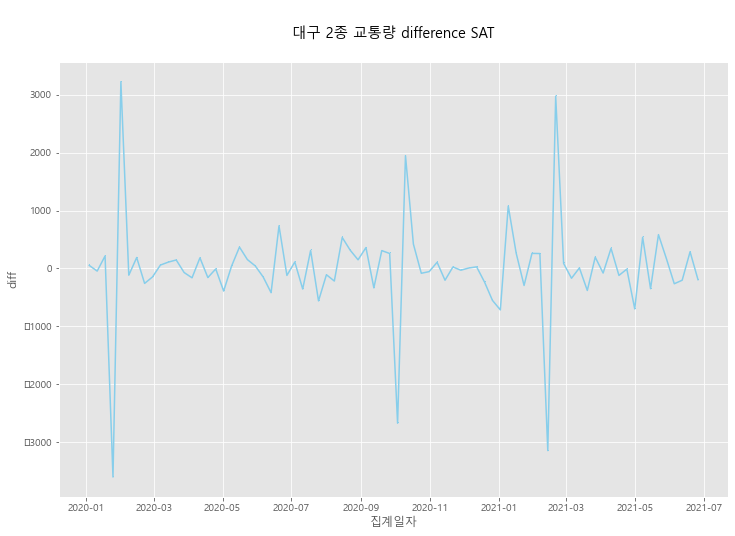

In [34]:
#요일별 편차 // 토요일
two_traffic_SAT= daegu_traffic_data[daegu_traffic_data.day_of_week=='SAT']
two_traffic_temp=two_traffic_SAT['2종교통량'].values
two_traffic_temp = np.insert(two_traffic_temp,0,0)
two_traffic_temp = np.delete(two_traffic_temp,two_traffic_temp.shape[0]-1)
two_traffic_SAT['diff_temp']=two_traffic_temp
two_traffic_SAT['diff']=two_traffic_SAT['2종교통량']-two_traffic_SAT['diff_temp']
two_traffic_SAT['diff2']=two_traffic_SAT['2종교통량']-two_traffic_SAT['2종교통량'].median()
two_traffic_SAT.head()
plt.figure(figsize=(12,8)) 
daegu_1_weekdays=sns.lineplot(data=two_traffic_SAT[((two_traffic_SAT.year==2020)|(two_traffic_SAT.year==2021))], x='집계일자', y='diff',linestyle='-', color='skyblue', marker=',')
daegu_1_weekdays.set(title='\n대구 2종 교통량 difference SAT\n')

[Text(0.5, 1.0, '\n대구 2종 교통량 difference SUN\n')]

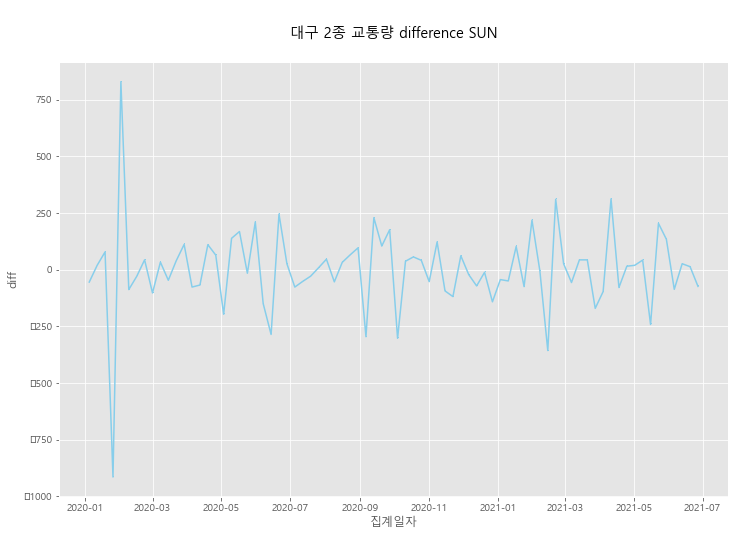

In [35]:
#요일별 편차 // 일요일
two_traffic_SUN= daegu_traffic_data[daegu_traffic_data.day_of_week=='SUN']
two_traffic_temp=two_traffic_SUN['2종교통량'].values
two_traffic_temp = np.insert(two_traffic_temp,0,0)
two_traffic_temp = np.delete(two_traffic_temp,two_traffic_temp.shape[0]-1)
two_traffic_SUN['diff_temp']=two_traffic_temp
two_traffic_SUN['diff']=two_traffic_SUN['2종교통량']-two_traffic_SUN['diff_temp']
two_traffic_SUN['diff2']=two_traffic_SUN['2종교통량']-two_traffic_SUN['2종교통량'].median()
two_traffic_SUN.head()
plt.figure(figsize=(12,8)) 
daegu_1_weekdays=sns.lineplot(data=two_traffic_SUN[((two_traffic_SUN.year==2020)|(two_traffic_SUN.year==2021))], x='집계일자', y='diff',linestyle='-', color='skyblue', marker=',')
daegu_1_weekdays.set(title='\n대구 2종 교통량 difference SUN\n')